### Index: 

#### 1. Importing Visualization Libraries and Data

#### 2. Data Cleaning

#### 3. Exploring Relationships

##### Correlations
##### Scatterplots
##### Pair Plots
##### Categorical Plots

# IMPORT VISUALIZATION LIBRARIES AND DATA

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [9]:
#Check for version of matplotlib version
matplotlib.__version__

'3.9.2'

In [10]:
# Create a variable "path" for source folder.
path = r'/Users/amritkaur/Desktop/CF Data Immersion/Chapter 6'

In [11]:
# Import the data into variable data
df = pd.read_csv(os.path.join(path, 'Task 6.1/retail_store_inventory.csv'))

# EXPLORE DEFINED QUESTIONS FROM PREVIOUS EXERCISE

In [13]:
df.shape

(73100, 15)

In [14]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [15]:
# Create a subset excluding 'Date', Store ID' and 'Product ID' columns
df_sub = df[['Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality']]

In [16]:
df_sub

,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...
73095,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring


### Define questions to explore:
1. What seasonal trends or patterns can be observed in sales data?
2. How do external factors like holidays or weather conditions influence
inventory levels? Are there any correlations between product pricing and
sales volume?
3. How do sales vary across different stores or regions? What insights can be
derived from analyzing promotions and their impact on sales?
4. What forecasting techniques would we use to predict inventory levels? How
do you handle the time-series nature of sales data in the model?
5. How do you communicate the limitations and uncertainties of your
forecasts to stakeholders?
6. What strategies could be implemented based on the forecasting results to
reduce costs in the supply chain?
7. How could forecasting help manage inventory during peak shopping
seasons, such as holidays?#

In [18]:
# Check for datatypes
df_sub.dtypes

Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object

In [19]:
# Select numerical values from data set
df_num = df_sub[['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Holiday/Promotion',
       'Competitor Pricing']]


In [20]:
df_num.head()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
0,231,127,55,135.47,33.50,20,0,29.69
1,204,150,66,144.04,63.01,20,0,66.16
2,102,65,51,74.02,27.99,10,1,31.32
3,469,61,164,62.18,32.72,10,1,34.74
4,166,14,135,9.26,73.64,0,0,68.95


In [21]:
#creating correlation matrix with numerical values only
corr_matrix = df_num.corr()

In [22]:
corr_matrix.round(2)

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
Inventory Level,1.00,0.59,0.00,0.59,0.01,0.0,0.00,0.01
Units Sold,0.59,1.00,-0.00,1.00,0.00,0.0,-0.00,0.00
Units Ordered,0.00,-0.00,1.00,-0.00,0.00,-0.0,0.01,0.00
Demand Forecast,0.59,1.00,-0.00,1.00,0.00,0.0,-0.00,0.00
Price,0.01,0.00,0.00,0.00,1.00,0.0,0.00,0.99
Discount,0.00,0.00,-0.00,0.00,0.00,1.0,-0.00,0.00
Holiday/Promotion,0.00,-0.00,0.01,-0.00,0.00,-0.0,1.00,0.00
Competitor Pricing,0.01,0.00,0.00,0.00,0.99,0.0,0.00,1.00


Text(0.5, 1.0, 'Correlation Matrix')

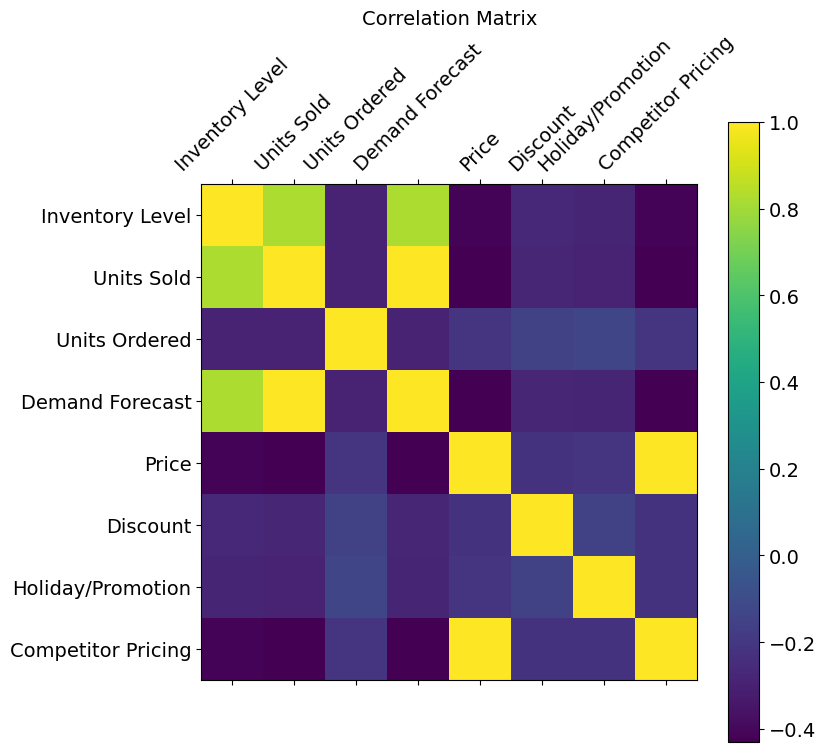

In [23]:
#plotting correlation matrix 
#setup plot
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(corr_matrix.corr(), fignum=f.number) # type of plot
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

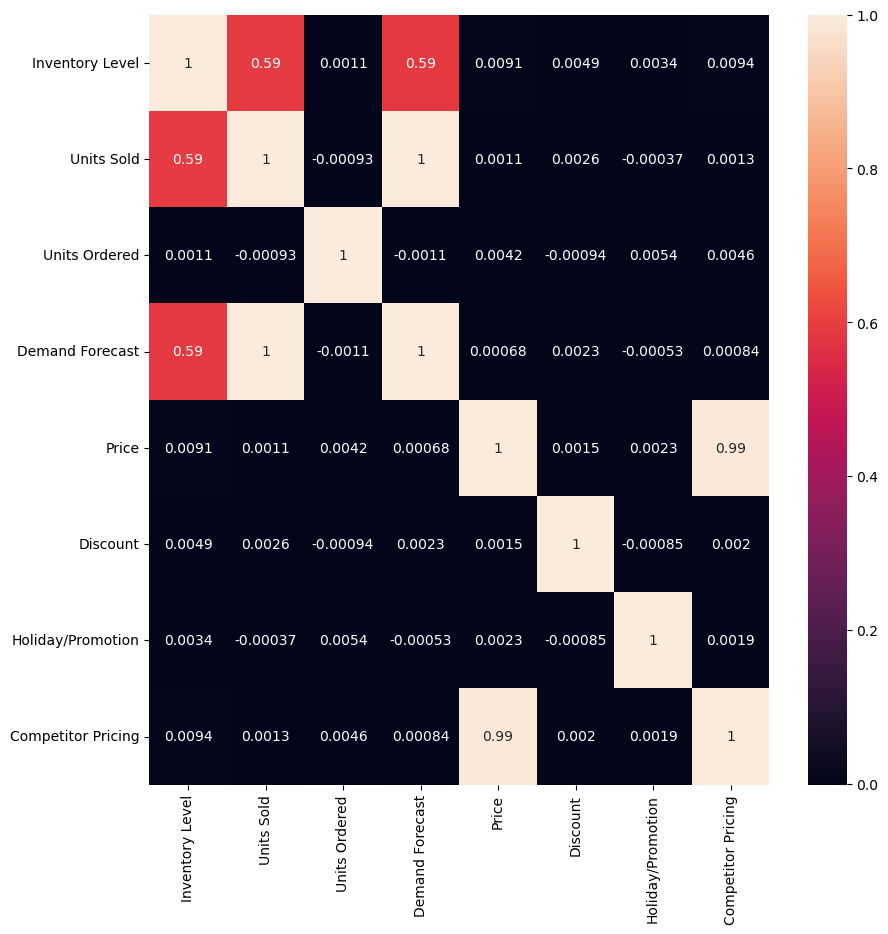

In [24]:
#creating correlation heatmap with unique colors for positive and negative correlations
#setup plot
f,ax = plt.subplots(figsize=(10,10))

#setup layout
corr_heat = sns.heatmap(corr_matrix, annot = True, ax = ax)

In [25]:
#export heatmap
corr_heat.figure.savefig(os.path.join(path, 'Task 6.2','Visualizations', 'heatmap_trends_analysis.png'))

### Discuss what the coefficients in the plot mean in terms of the relationships between the variables.:
##### Strong Positive Correlations: A moderately strong correlation of 0.59, indicating that higher inventory levels are likely associated with higher demand forecasts.An extremely high correlation of 0.99, suggesting that prices are almost identical to competitor pricing, possibly due to price matching or market trends. Weak Correlations: Most other pairs of variables, such as Units Sold, Units Ordered, Discount, and Holiday/Promotion, show near-zero correlations with other variables. Discount and other features like Inventory Level, Demand Forecast, and Price have weak or negligible correlations. 


## SCATTERPLOT

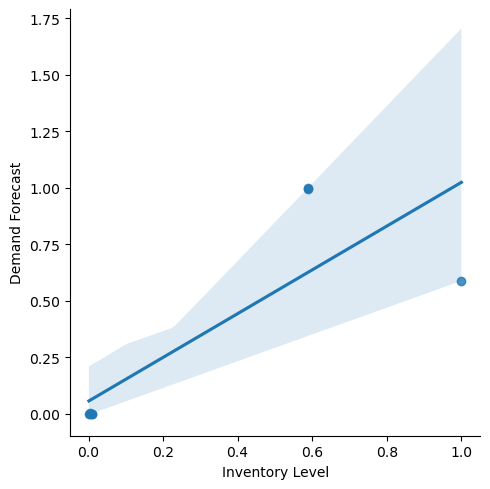

In [28]:
# Create a scatterplot for the "Inventory Level" and "Demand Forecast" columns in seaborn

scat = sns.lmplot(x = 'Inventory Level', y = 'Demand Forecast', data = corr_matrix)

##### The correlation shown in the heatmap (0.59) aligns with this plot, suggesting a moderate linear relationship between the two variables. The shaded area above shows the area within which the true regression line is likely to lie. This gives a measure of uncertainty. A wider interval in higher Inventory Levels reflects greater variability in predictions.


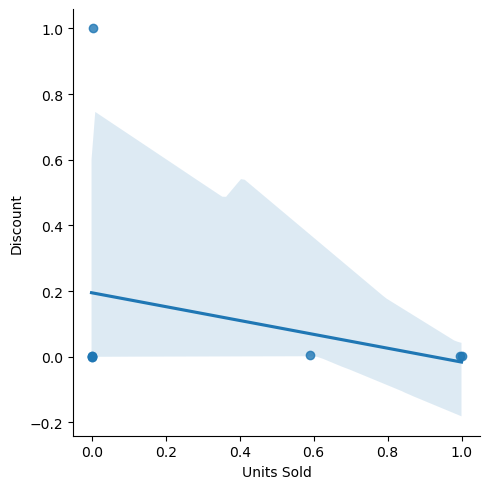

In [30]:
# Create a scatterplot for the "Units Sold" and "Discount" columns in seaborn

scat1 = sns.lmplot(x = 'Units Sold', y = 'Discount', data = corr_matrix)

##### The slope isn't steep, and the points are scattered without much clustering tightly around the line. All this would seem to indicate a weak correlation that is reinforced by a near-zero 0.0026 correlation coefficient shown in the heat map.


In [32]:
#Export Scatterplots
scat.figure.savefig(os.path.join(path, 'Task 6.2','Visualizations', 'scat_inventory.png'))
scat1.figure.savefig(os.path.join(path, 'Task 6.2','Visualizations', 'scat1_discount.png'))

In [33]:
#Understanding spread of data in 'Units Sold'
corr_matrix['Units Sold'].describe().round()

count    8.0
mean     0.0
std      0.0
min     -0.0
25%      0.0
50%      0.0
75%      1.0
max      1.0
Name: Units Sold, dtype: float64

In [34]:
#Exclude outliers 
Q1 = corr_matrix['Units Sold'].quantile(0.25)
Q3 = corr_matrix['Units Sold'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points that are 1.5 times the IQR below Q1 or above Q3
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Filter Units Sold outliers
units_no_outliers = corr_matrix.loc[(corr_matrix['Units Sold'] >= lower) & (corr_matrix['Units Sold'] <= upper), 'Units Sold']

In [35]:
# Filter Discount according to discount_no_outliers 
discount_no_outliers = corr_matrix.loc[(corr_matrix['Discount'] >= lower) & (corr_matrix['Discount'] <= upper), 'Discount']

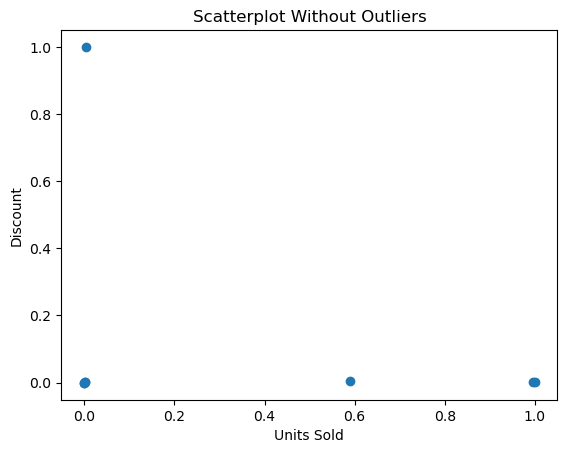

In [36]:
#Scatterplot Units Sold without outliers and Discount
scat2 = plt.scatter(units_no_outliers, discount_no_outliers)
plt.xlabel('Units Sold')
plt.ylabel('Discount')
plt.title('Scatterplot Without Outliers')
plt.show()

Text(0.5, 1.0, 'Distribution of Number of Sold Units')

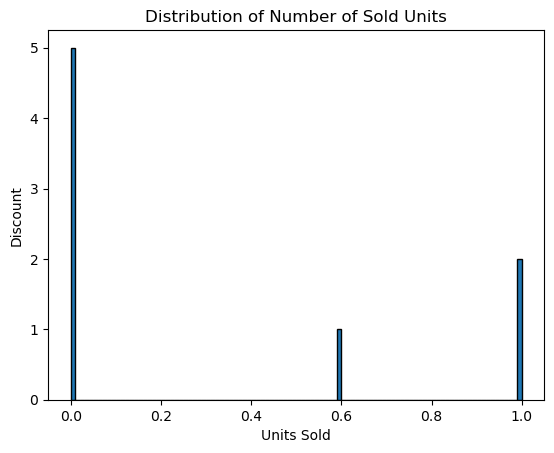

In [37]:
# Creating a histogram to understand outlier data points.
plt.hist(corr_matrix['Units Sold'], bins=100, edgecolor='black')
# Add labels and title
plt.xlabel('Units Sold')
plt.ylabel('Discount')
plt.title('Distribution of Number of Sold Units')

## PAIR PLOT

In [39]:
#defining and generating pair plot 

sub_2 = df_num[['Units Sold','Price','Units Ordered', 'Demand Forecast', 'Discount', 'Holiday/Promotion']]


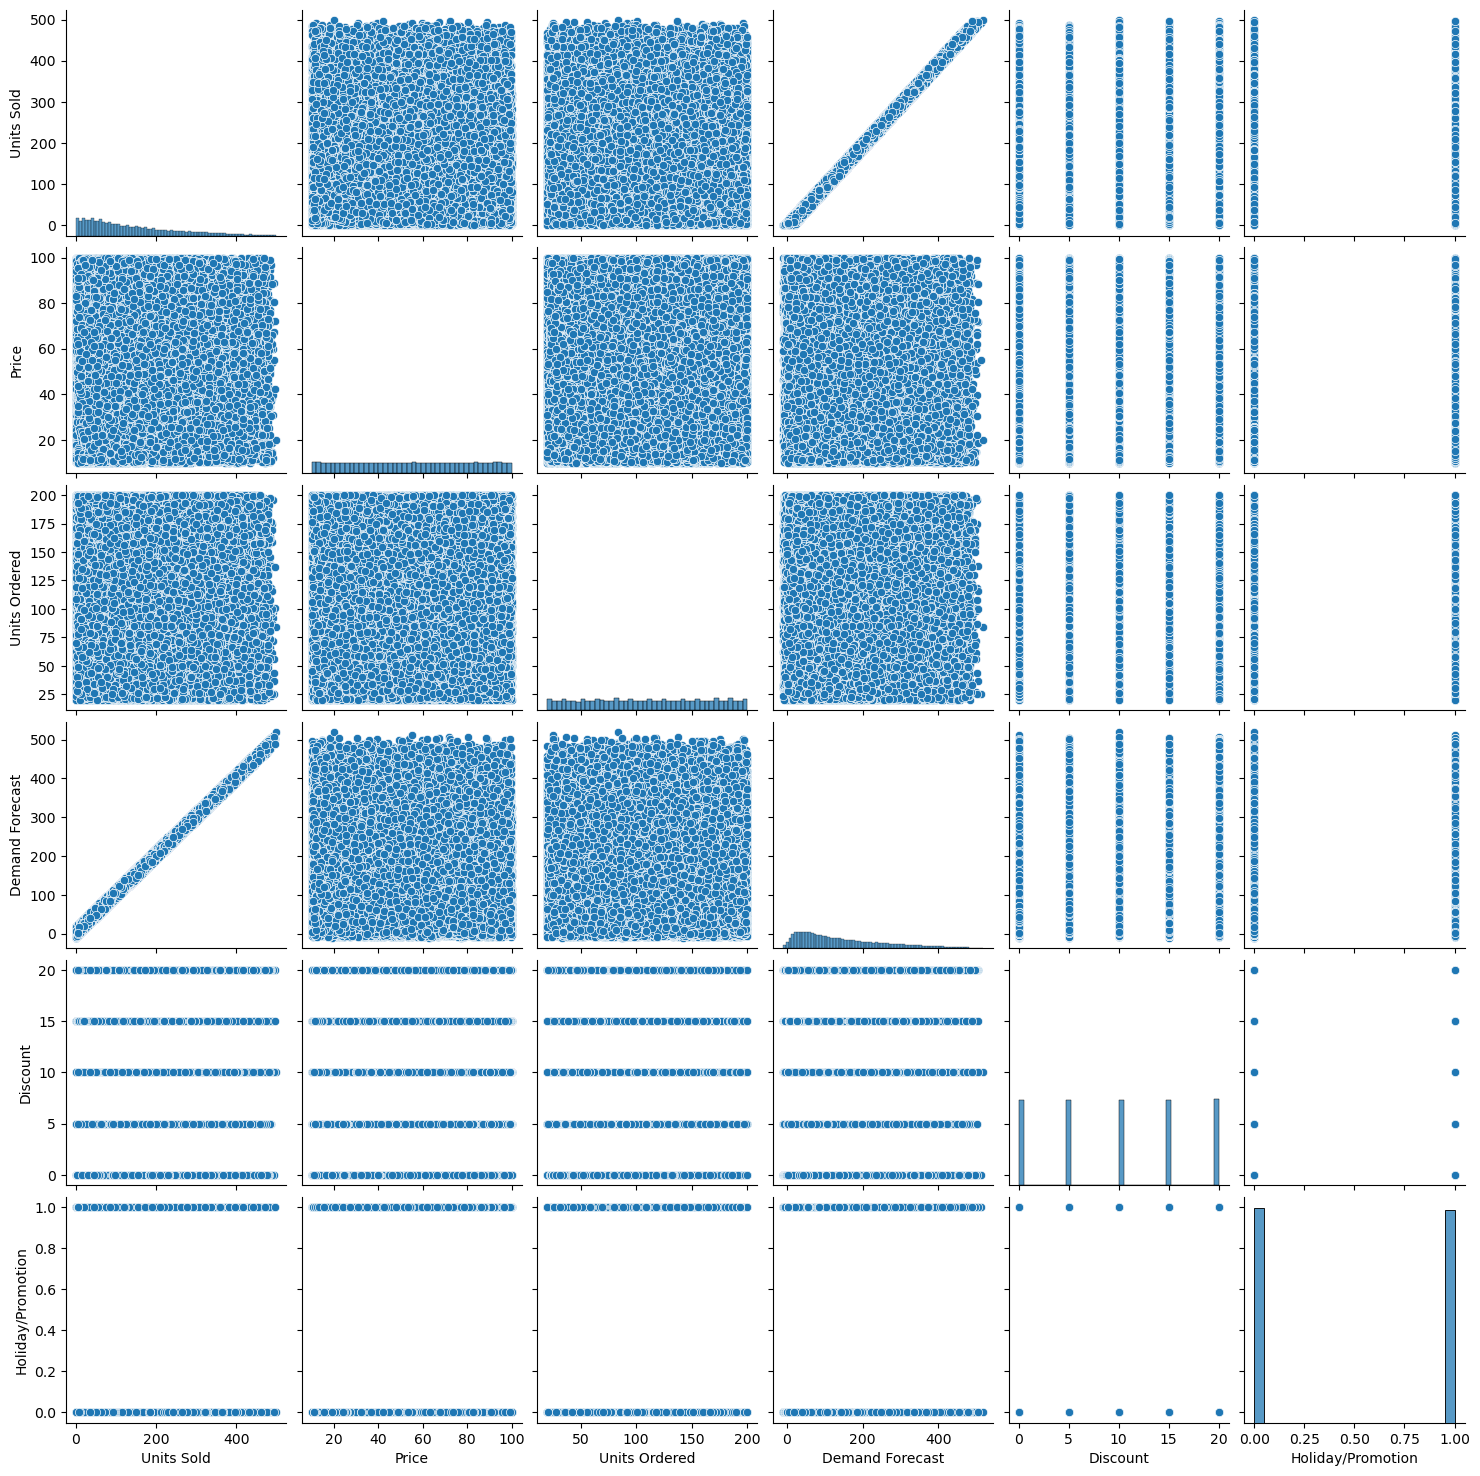

In [40]:
# Create a pair plot 

g = sns.pairplot(sub_2)

#### Difficult to find any meaningful insight from these plots. It looks like there is weak relationship in some variables such as Unit sold, Discounts and Unit Ordered. We need to analyze the factor like holiday or Promotions and sales.

## CATEGORICAL PLOT 

<Axes: xlabel='Units Sold', ylabel='Count'>

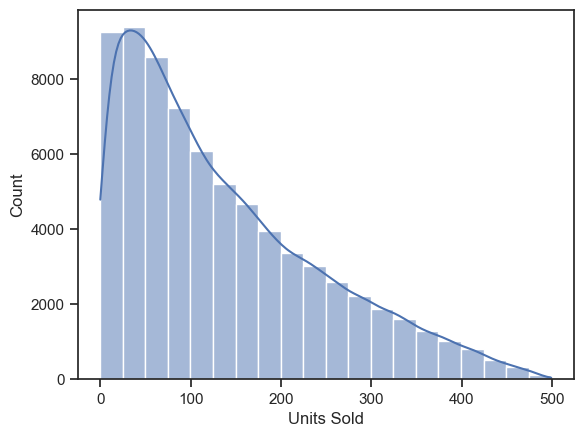

In [119]:
# Use a histogram to visualize the distribution of the variables. 
sns.histplot(df['Units Sold'], bins = 20, kde = True)

In [168]:
df['Category'].head()

0      Groceries
1           Toys
2           Toys
3           Toys
4    Electronics
Name: Category, dtype: object

In [170]:
grouped = df.groupby('Category')

In [178]:
result = grouped['Units Sold'].count()

In [180]:
print(result)

Category
Clothing       14626
Electronics    14521
Furniture      14699
Groceries      14611
Toys           14643
Name: Units Sold, dtype: int64


In [182]:
df['Units Sold'].max()

499

In [184]:
df.loc[df['Units Sold'] < 50, 'Sale'] = 'Low'

In [137]:
df.loc[(df['Units Sold'] >= 50) & (df['Units Sold'] < 250), 'Sale'] = 'Middle'

In [139]:
df.loc[df['Units Sold'] > 250, 'Sale'] = 'High'

In [141]:
df['Sale'].value_counts(dropna = False)

Sale
Middle    42232
Low       18642
High      12226
Name: count, dtype: int64

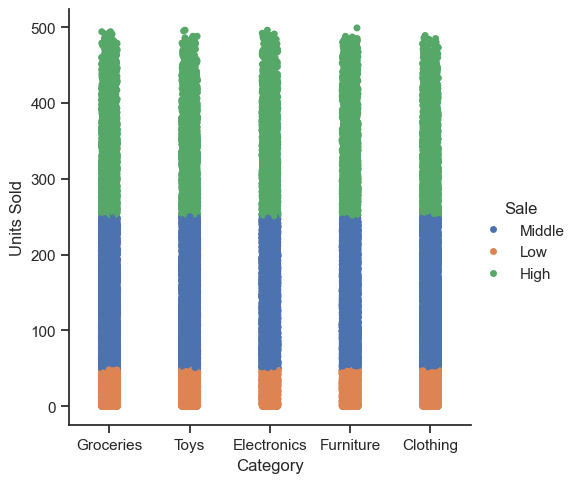

In [190]:
# Create a categorical plot in seaborn using the Sales categories created above

sns.set(style="ticks")
g = sns.catplot(x="Category", y= "Units Sold", hue="Sale", data=df)

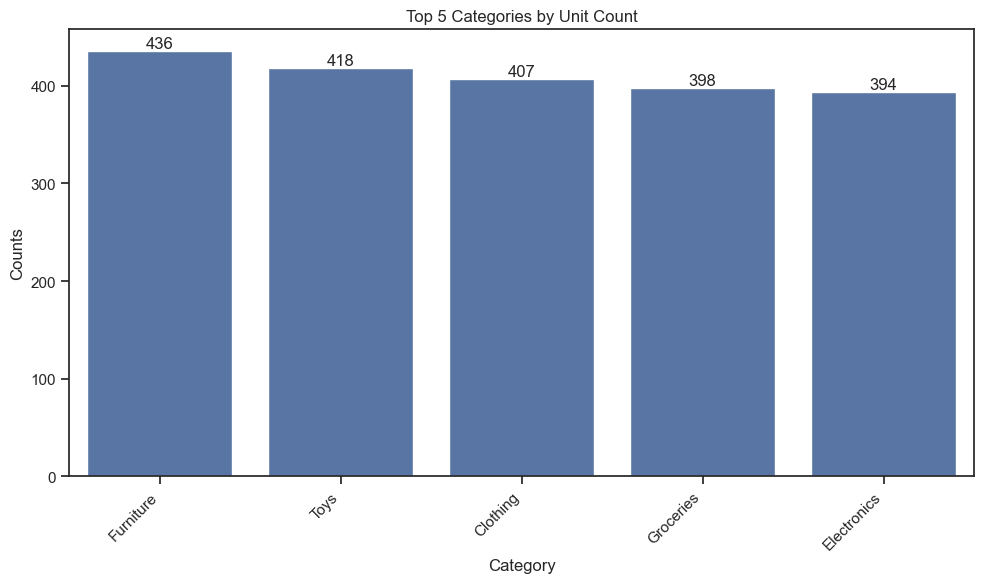

In [246]:
#Create a box(or whichever plot turns out best) 

#Get the top 5 categories by count
top_category = df['Category'].value_counts().head(5)
top_units = df['Units Sold'].value_counts().head(5)
# Create a bar plot with log scale
plt.figure(figsize=(10, 6))
ab=sns.barplot(x=top_category.index, y=top_units.values)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Top 5 Categories by Unit Count')
ab.bar_label(ab.containers[0])
plt.tight_layout()

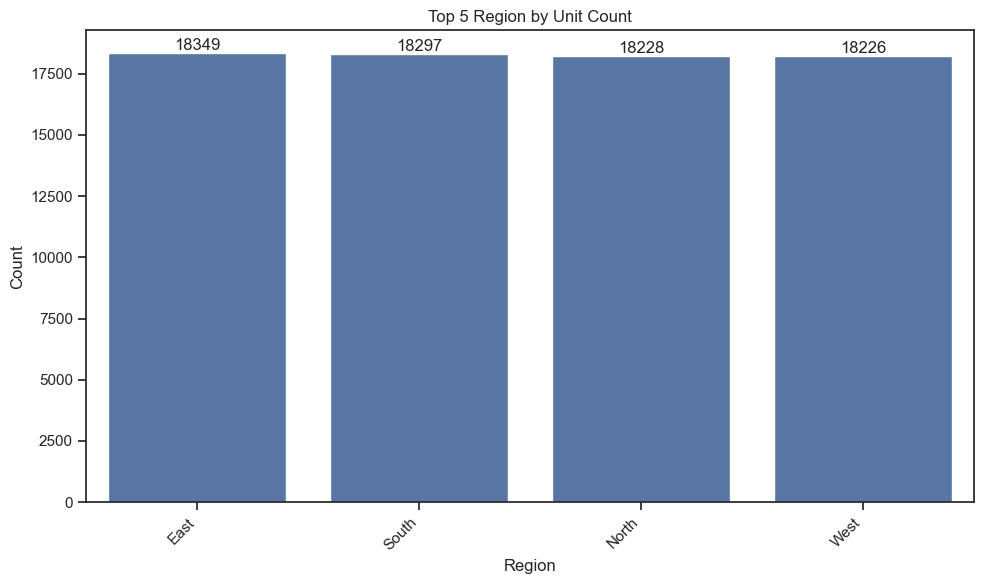

In [258]:
#Create a box chart

top_region = df['Region'].value_counts().head(5)
top_units = df['Units Sold'].value_counts().head(5)
plt.figure(figsize=(10, 6))
ab=sns.barplot(x=top_region.index, y=top_region.values)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Top 5 Region by Unit Count')
ab.bar_label(ab.containers[0])
plt.tight_layout()

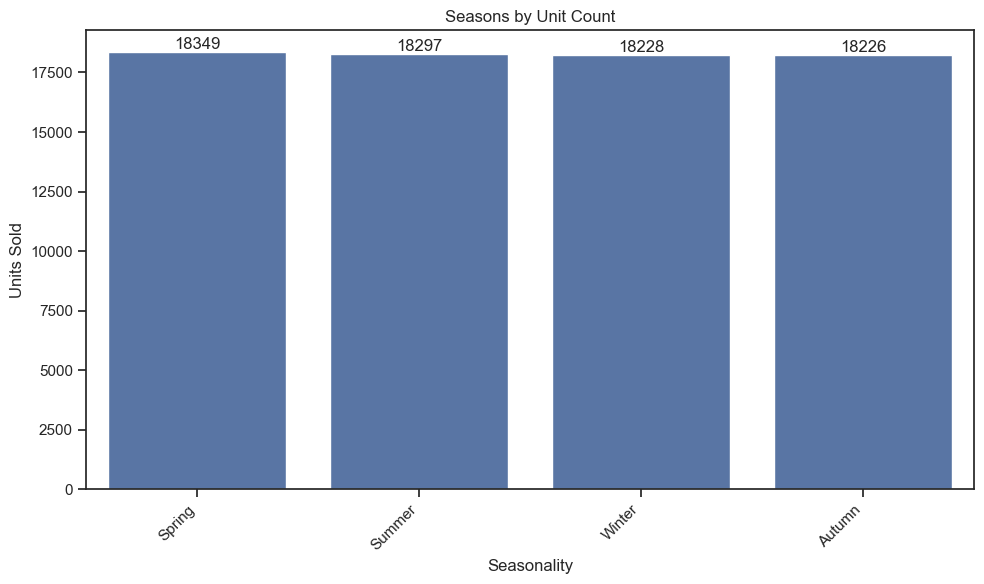

In [260]:
#Create a box chart

season = df['Seasonality'].value_counts().head()
top_units = df['Units Sold'].value_counts().head()
plt.figure(figsize=(10, 6))
ab=sns.barplot(x=season.index, y=top_region.values)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Seasonality')
plt.ylabel('Units Sold')
plt.title('Seasons by Unit Count')
ab.bar_label(ab.containers[0])
plt.tight_layout()

#### These bar charts clearly indicates that there is slightly difference in product sale in Regions and Categories. In future, We need to analyze the prediction of forecast demand of product based on previous sales as well as analyze the sales trends to optimize inventory level.

## Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration. Define any hypotheses that you can at this point. 

#### What seasonal trends or patterns can be observed in sales data?
##### When it comes to unit sold by seasonality, the bar chart indicates the highest sales in Spring. Although, there is no big difference in sales during other seasons but least sales happen in Autumn. 

#### How do sales vary across different stores or regions? What insights can be derived from analyzing promotions and their impact on sales?
##### Most sales happened in East region, then followed by South, North and West. From my driven analysis, Promotions does not impact on store sales. But we don't have the complete report for all the store across regions so we can't tell whether this analysis is accurate or not. 

In [267]:
df['Holiday/Promotion'].value_counts(dropna = False)

Holiday/Promotion
0    36747
1    36353
Name: count, dtype: int64

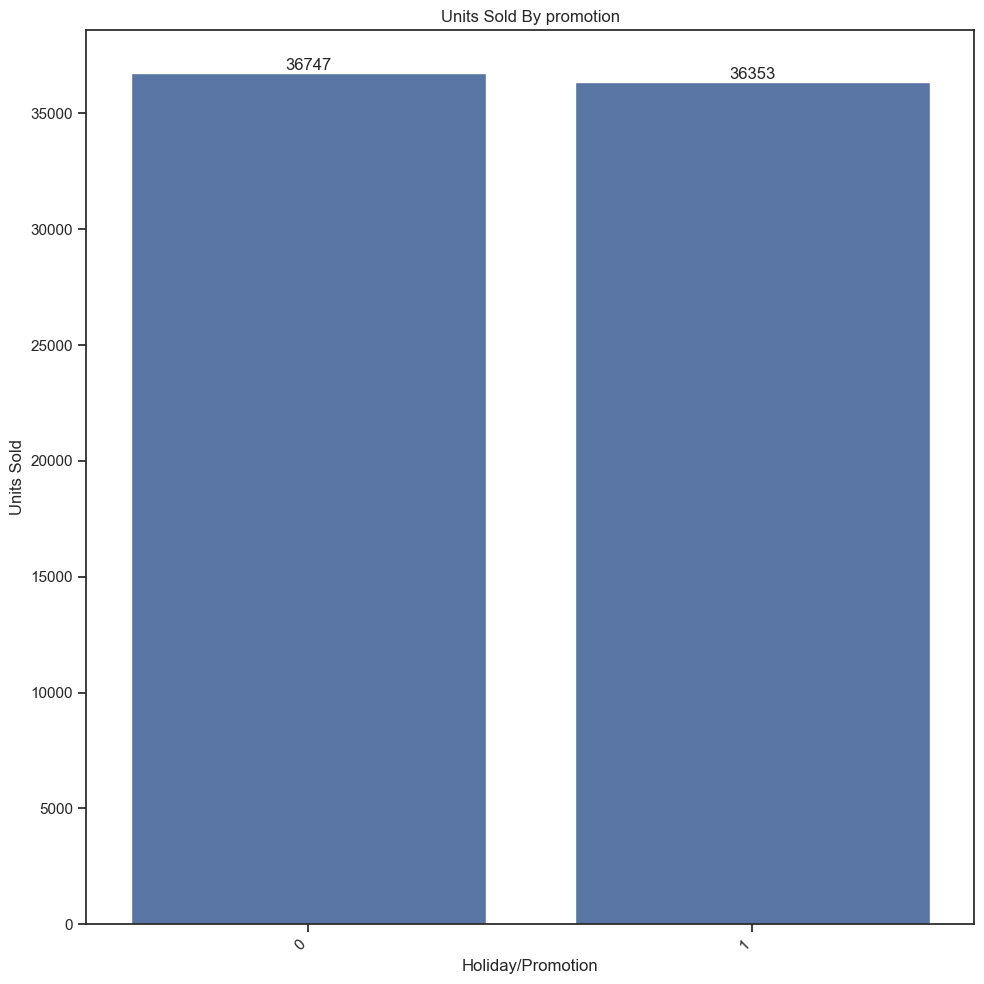

In [275]:
#Create a bar chart

prom = df['Holiday/Promotion'].value_counts().head(5)

plt.figure(figsize=(10, 10))
ab=sns.barplot(x=prom.index, y=prom.values)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Holiday/Promotion')
plt.ylabel('Units Sold')
plt.title('Units Sold By promotion')
ab.bar_label(ab.containers[0])
plt.tight_layout()

#### 1. Products related to seasons or holidays will sell more at the right times. For example, Winter jackets will sell better in winter than in summer.
#### 2. Sales volumes for specific categories (e.g., gifts, holiday items, and seasonal products) increase significantly during holiday periods, resulting in distinct demand patterns.
#### 3. If the store has low inventory level, sales volume of that specific store will be less.